In [1]:
import MRzeroCore as mr0
import matplotlib.pyplot as plt
import numpy as np

In [2]:
phantom = mr0.VoxelGridPhantom.brainweb("subject05.npz")
phantom = phantom.interpolate(64, 64, 32).slices([16])
data = phantom.build()

seq_file = mr0.PulseqFile("out/flash pTx.seq")
seq = mr0.Sequence.from_seq_file(seq_file)
seq.plot_kspace_trajectory()

# Simulate the sequence
graph = mr0.compute_graph(seq, data, 200, 1e-3)
signal = mr0.execute_graph(graph, seq, data)

c:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
c:\Users\jonat\AppData\Local\Programs\Python\Python311\Lib\site-packages\MRzeroCore\phantom\voxel_grid_phantom.py:154: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(shape, device=self.PD.device) / 2,


AssertionError: 

reconstruct and plot


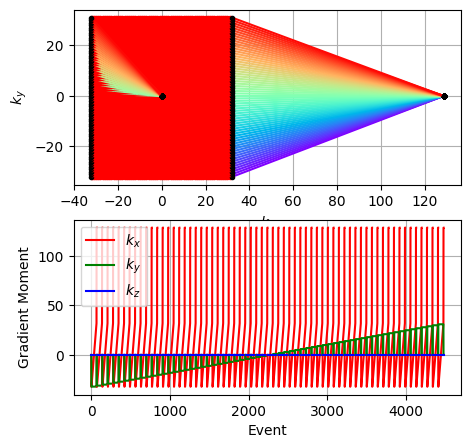

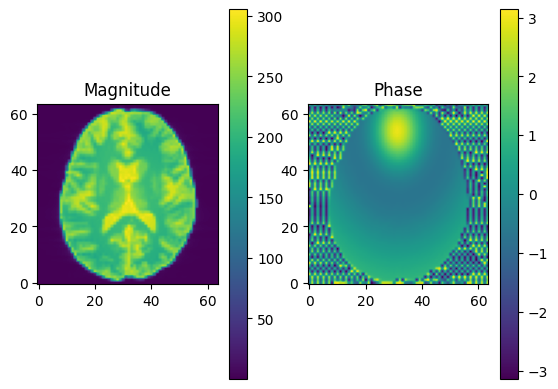

In [ ]:
#@title 3. reconstruct the image
# Unfortunately, we need to limit the resolution as reco_adjoint is very RAM-hungy
print('reconstruct and plot')
seq.plot_kspace_trajectory()

reco = mr0.reco_adjoint(signal, seq.get_kspace(), resolution=(64, 64, 1), FOV=(1, 1, 1))
plt.figure()
plt.subplot(121)
plt.title("Magnitude")
plt.imshow(reco[:, :, 0].T.abs(), origin="lower")
plt.colorbar()
plt.subplot(122)
plt.title("Phase")
plt.imshow(reco[:, :, 0].T.angle(), origin="lower", vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.show()